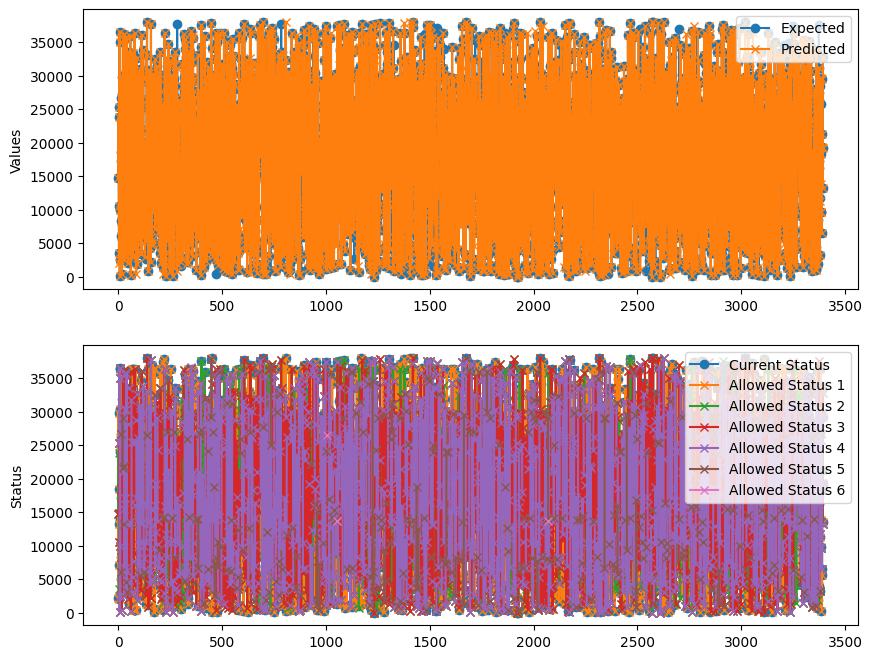

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 读取 te.txt 文件
with open("te.txt", "r") as file:
    lines = file.readlines()

entity_ids, traj_ids, expecteds, predicts, current_statuses, allowed_statuses = [], [], [], [], [], []
max_allowed_length = 0  # 用于记录允许状态的最大长度

for line in lines:
    parts = line.strip().split()
    entity_id = int(parts[1])
    traj_id = int(parts[3])
    expected = int(parts[5])
    predict = int(parts[7])
    
    # 使用正确的索引获取状态信息
    current_status = int(parts[10])  # 调整索引
    allowed_status = list(map(int, parts[12].split(';')))  # 调整索引
    
    entity_ids.append(entity_id)
    traj_ids.append(traj_id)
    expecteds.append(expected)
    predicts.append(predict)
    current_statuses.append(current_status)
    allowed_statuses.append(allowed_status)
    
    # 更新最大允许状态的长度
    max_allowed_length = max(max_allowed_length, len(allowed_status))

# 将二维列表填充为矩阵，不足的部分用NaN填充
allowed_statuses_array = np.full((len(allowed_statuses), max_allowed_length), np.nan)
for i, allowed_status in enumerate(allowed_statuses):
    allowed_statuses_array[i, :len(allowed_status)] = allowed_status

# 创建图形
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 第一个子图：期望和预测
axs[0].plot(expecteds, label='Expected', marker='o')
axs[0].plot(predicts, label='Predicted', marker='x')
axs[0].set_ylabel('Values')
axs[0].legend()

# 第二个子图：当前状态和允许状态
axs[1].plot(current_statuses, label='Current Status', marker='o')
# 将矩阵的每一列作为一个曲线进行绘制
for i in range(allowed_statuses_array.shape[1]):
    axs[1].plot(allowed_statuses_array[:, i], label=f'Allowed Status {i + 1}', marker='x')
axs[1].set_ylabel('Status')
axs[1].legend()

plt.show()



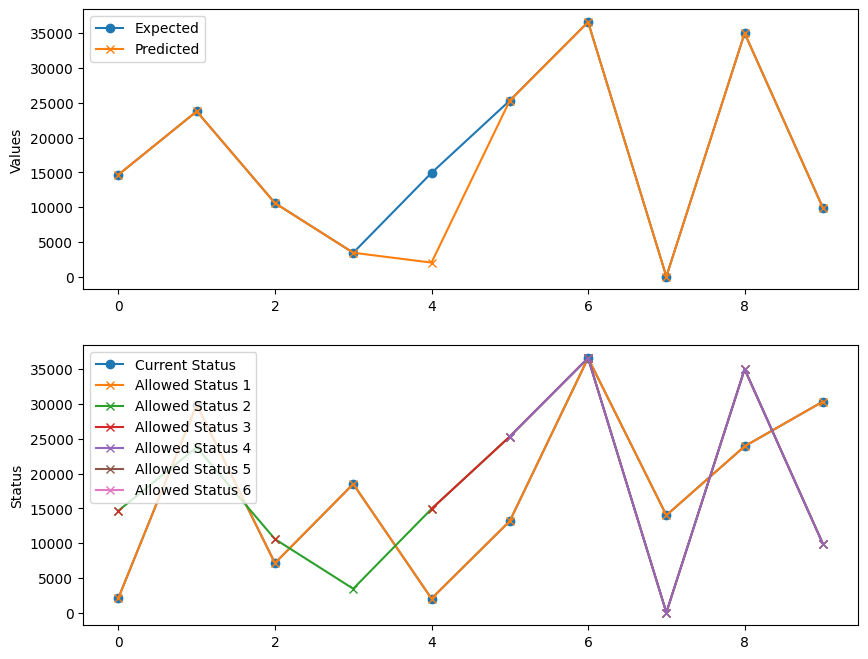

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 提取部分数据
sample_size = 10  # 您想展示的数据量
sample_entity_ids = entity_ids[:sample_size]
sample_expecteds = expecteds[:sample_size]
sample_predicts = predicts[:sample_size]
sample_current_statuses = current_statuses[:sample_size]
sample_allowed_statuses_array = allowed_statuses_array[:sample_size, :]

# 创建图形
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 第一个子图：期望和预测
axs[0].plot(sample_expecteds, label='Expected', marker='o')
axs[0].plot(sample_predicts, label='Predicted', marker='x')
axs[0].set_ylabel('Values')
axs[0].legend()

# 第二个子图：当前状态和允许状态
axs[1].plot(sample_current_statuses, label='Current Status', marker='o')
# 将矩阵的每一列作为一个曲线进行绘制
for i in range(sample_allowed_statuses_array.shape[1]):
    axs[1].plot(sample_allowed_statuses_array[:, i], label=f'Allowed Status {i + 1}', marker='x')
axs[1].set_ylabel('Status')
axs[1].legend()

plt.show()


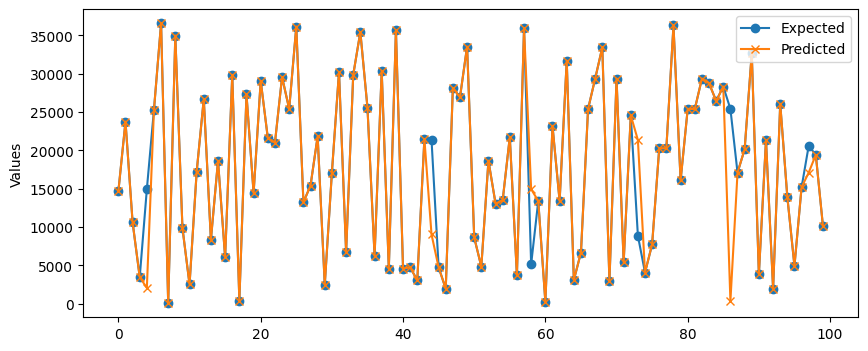

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 提取部分数据
sample_size = 100  # 您想展示的数据量
sample_entity_ids = entity_ids[:sample_size]
sample_expecteds = expecteds[:sample_size]
sample_predicts = predicts[:sample_size]

# 创建图形
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# 第一个子图：期望和预测
axs.plot(sample_expecteds, label='Expected', marker='o')
axs.plot(sample_predicts, label='Predicted', marker='x')
axs.set_ylabel('Values')
axs.legend()

plt.show()
